# Project - Measure Interpolation Impact

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- The goal of the project is to see how big impact interpolation can have on results.
- The focus is mainly on step 2.
- To see the impact we will make simple model usages.
- The project will not go into details of steps 3 to 5.

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1.b: Read the data
- Use ```pd.read_parquet()``` to read the file `files/weather-predict.parquet`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [2]:
data=pd.read_parquet('files/weather-predict.parquet')

In [3]:
data.head()

,Pressure,Pressure+24h
Datetime,,
2006-04-01 00:00:00,1015.13,1015.68
2006-04-01 01:00:00,1015.63,1015.41
2006-04-01 02:00:00,1015.94,1014.98
2006-04-01 03:00:00,1016.41,1015.18
2006-04-01 04:00:00,1016.51,1014.70


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96418 entries, 2006-04-01 00:00:00 to 2016-09-09 23:00:00
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pressure      96418 non-null  float64
 1   Pressure+24h  96380 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


In [6]:
len(data)

96418

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [8]:
data.dtypes

Pressure        float64
Pressure+24h    float64
dtype: object

In [9]:
data.describe()

,Pressure,Pressure+24h
count,96418.000000,96380.000000
mean,1003.231025,1003.227178
std,116.990796,117.013672
min,0.000000,0.000000
25%,1011.900000,1011.900000
50%,1016.440000,1016.450000
75%,1021.090000,1021.090000
max,1046.380000,1046.380000


### Step 2.b: Check the length, null-values, and zero values
- Check the length
    - HINT: Use `len()`
- Check the number of null-values
    - HINT: Use `.isna().sum()`
- Check the number of zero-values
    - HINT: Use `(data == 0).sum()`

In [12]:
dataset=data[(data['Pressure']!=0) & (data['Pressure+24h']!=0)]
dataset.head()

,Pressure,Pressure+24h
Datetime,,
2006-04-01 00:00:00,1015.13,1015.68
2006-04-01 01:00:00,1015.63,1015.41
2006-04-01 02:00:00,1015.94,1014.98
2006-04-01 03:00:00,1016.41,1015.18
2006-04-01 04:00:00,1016.51,1014.70


In [13]:
dataset.describe()

,Pressure,Pressure+24h
count,94388.000000,94350.000000
mean,1016.822359,1016.825897
std,7.778243,7.778059
min,973.780000,973.780000
25%,1012.140000,1012.130000
50%,1016.560000,1016.560000
75%,1021.170000,1021.180000
max,1046.380000,1046.380000


<AxesSubplot:>

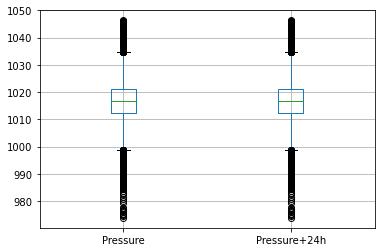

In [17]:
dataset.boxplot()

In [28]:
cols=['Pressure','Pressure+24h']

for col in cols:
    Q1,Q3=dataset[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    upper_limit=Q3 + 1.5*IQR
    lower_limit=Q1 - 1.5*IQR
    dataset=dataset[(dataset[col]>lower_limit) & (dataset[col]<upper_limit)]

In [29]:
len(dataset)

87696

### Step 2.c: Baseline
- Check the correlation to have a measure if we did nothing
    - HINT: Use `corr()`

In [30]:
dataset.corr()

,Pressure,Pressure+24h
Pressure,1.000000,0.736659
Pressure+24h,0.736659,1.000000


In [31]:
data.corr()

,Pressure,Pressure+24h
Pressure,1.000000,0.419074
Pressure+24h,0.419074,1.000000


<AxesSubplot:>

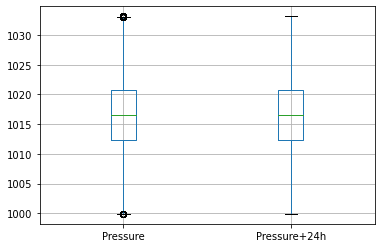

In [32]:
dataset.boxplot()

### Step 2.d: Prepare data
- We know `Pressure+24` has NaN and 0 values.
- These are not correct values and we cannot use them in our model.
- Create a `dataset` without these rows.
    - HINT: Use filters like `data[data['Pressure+24h'] != 0]` and `dropna()`

### Step 2.e: Check the size and zero values
- Check the size of datasets `data` and `datasets`
- Check how many zero-values each dataset has

### Step 2.f: Check the correlation
- For fun check the correlation of `dataset`
- Then do the same after you interpolated 0 values
    - HINT: Apply `replace` and `interpolate`
- Does the result surprice you?
- Notice how much interpolation improves the result

### Step 2.g: Linear Regression Function
- Create function `regression_score` to calculate the r-square score
- It should take independent features X and dependent feature y
- Then split that into training and testing sets.
- Fit the training set.
- Predict the test set.
- Return the r-square score

In [40]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

### Step 2.h: Test baseline
- Test the `regression_score` function on `dataset`

In [57]:
X=dataset.drop(columns='Pressure+24h',axis=1)
Y=dataset[['Pressure+24h']]
X_train, X_test, y_train, y_test=train_test_split(X,Y,random_state=42,test_size=0.2)


In [58]:
kn.fit(X_train,y_train)

C:\Users\Haseeb Aqeel\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: Unknown label type: 'continuous'

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

### Step 2.i: Test on interploated dataset
- Make a interpolated dataset
- Get the result (from `regression_score`) for interpolated dataset

In [60]:
pred=lr.predict(X_test)
pred

array([[1016.01995352],
       [1017.88922325],
       [1015.61519039],
       ...,
       [1017.05025967],
       [1026.1758284 ],
       [1019.39052649]])

In [61]:
lr.score(X_test,y_test)

0.5417469353650629

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(X_test,pred)

0.9302666761358417

In [65]:
regression_score(dataset[['Pressure']],dataset['Pressure+24h'])

NameError: name 'regression_score' is not defined